<a href="https://colab.research.google.com/github/MainakRepositor/Deep-Learning-Python/blob/master/Fashion_MNIST_Categorization_(CNN)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Categorization using CNN

<hr>

### In this project, we will classify some data from the MNIST fashion dataset into their particular fashion categories depending on the image labels with the help of convolutional neural networks or CNN

In [1]:
!pip install tensorflow==2.0-rc0

## 1. Importing  the necessary libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.0.0-rc0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten


print("All packages have been included successfully!")

All packages have been included successfully!


## 2. Importing the dataset

In [4]:
mnist = keras.datasets.fashion_mnist

## 3. Splitting dataset into train and test

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## 4. Data Exploration

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
y_train.shape

(60000,)

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
# finding maximum value of the training set
np.max(x_train)

255

In [11]:
# finding maximum value of the test set
np.max(x_test)

255

In [12]:
# finding mean train values
np.mean(x_train)

72.94035223214286

In [13]:
# finding mean test values
np.mean(x_test)

73.14656658163265

## Image Labels :
### 0: T-shirt/top;
### 1: Trouser;
### 2: Pullover;
### 3: Dress;
### 4: Coat;
### 5: Sandal;
### 6: Shirt;
### 7: Sneaker;
### 8: Bag;
### 9: Ankle boot.

## 5.Displaying labelled images

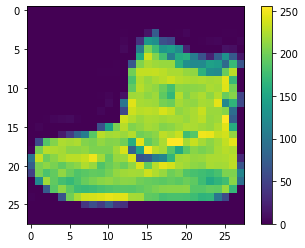

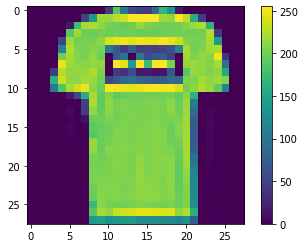

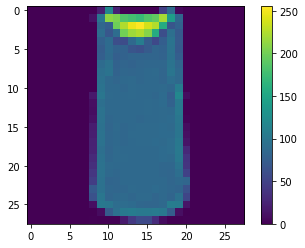

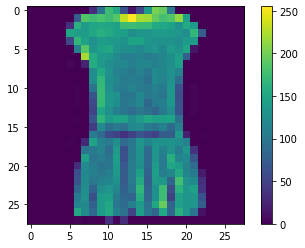

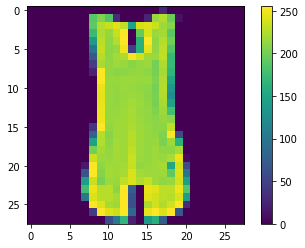

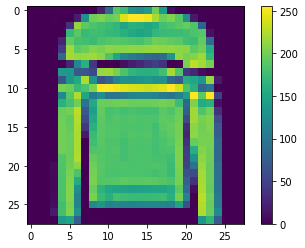

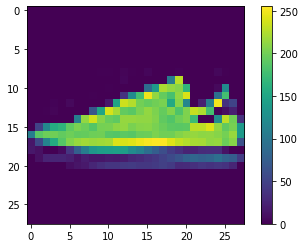

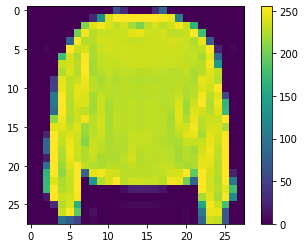

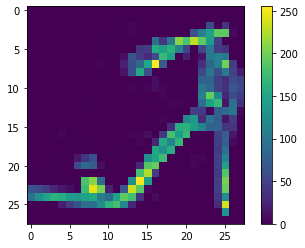

In [14]:
# displaying the labelled images
for i in range (0,9):
  plt.figure(i)
  plt.imshow(x_train[i])
  plt.colorbar()

## 6. Grayscale fitting. 
### Reducing the training and test set dimensions. The values in terms of 255, i.e. the highest value of the training and test set have been reduced to decimal points in the same and less than 1, so that classification becomes compatable for the model. This will produce better results.

In [15]:
x_train = x_train / 255.0

In [16]:
x_test = x_test / 255.0

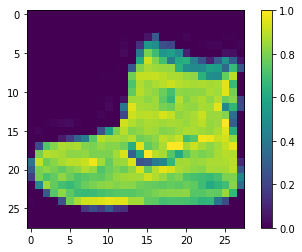

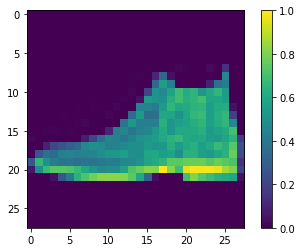

In [17]:
plt.figure(1)
plt.imshow(x_train[0])
plt.colorbar()

plt.figure(2)
plt.imshow(x_test[0])
plt.colorbar()

## 7. Making the CNN Model for classification

In [18]:
# Setting up of the Neurons
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
# input layer
model.add(Flatten(input_shape=(28,28)))
# first hidden layer
model.add(Dense(28,activation='relu'))
# second hidden layer
model.add(Dense(28,activation='relu'))
# third hidden layer
model.add(Dense(28,activation='relu'))
# output layer
model.add(Dense(10,activation='softmax'))
model.summary()

## At output layer, we use the softmax function as an activation function becuase it is capable of multivalued classification


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 28)                21980     
_________________________________________________________________
dense_1 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_2 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                290       
Total params: 23,894
Trainable params: 23,894
Non-trainable params: 0
_________________________________________________________________


In [19]:
# including the optimizer to reduce overfitting of data
model.compile(optimiszer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [20]:
# fitting the model
model.fit(x_train,y_train,epochs=100)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 99us/sample - loss: 0.5855 - accuracy: 0.7893
Epoch 2/100
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4137 - accuracy: 0.8505
Epoch 3/100
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3788 - accuracy: 0.8633
Epoch 4/100
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3618 - accuracy: 0.8702
Epoch 5/100
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3501 - accuracy: 0.8742
Epoch 6/100
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3412 - accuracy: 0.8778
Epoch 7/100
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3353 - accuracy: 0.8788
Epoch 8/100
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3323 - accuracy: 0.8812
Epoch 9/100
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3281 - accuracy: 0.8833
Epoch

## 8. Calculating accuracy of model

In [21]:
test_loss,test_acc = model.evaluate(x_test,y_test)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [22]:
print("The accuracy of the model is =",test_acc)

The accuracy of the model is = 0.8458
